# Data Import

In [1]:
from data_mining2 import data
d=data()

11it [00:13,  1.24s/it]


In [2]:
dataset=d.merge_whole_dataset()

100%|██████████| 14/14 [00:00<00:00, 134.62it/s]


In [100]:
import datetime
import pandas as pd
dataset['Date_datetime'] = dataset['Date'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d')))

In [110]:
countryset = dataset[dataset["Country_Region"]=="Korea, South"]
countryset["StringencyIndex"].fillna(value=71.0,inplace = True)
x_data = range(len(countryset.index))
y_data = countryset[["ConfirmedCases","StringencyIndex"]]

In [108]:
y_data.head(60)

,ConfirmedCases,StringencyIndex
9490,1,14.0
9491,1,14.0
9492,2,14.0
9493,2,14.0
9494,3,14.0
9495,4,14.0
9496,4,14.0
9497,4,14.0
9498,4,14.0
9499,11,24.0


In [85]:
# Poisson regression code
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy.optimize import curve_fit
exog, endog = sm.add_constant(x_data), y_data
#mod = sm.GLM(endog, exog,
#             family=sm.families.Binomial(link=sm.families.links.logit))
#mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
mod = sm.GLM(endog, exog, family=sm.families.Gaussian(link=sm.families.links.identity()))
res = mod.fit()

In [80]:
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         ConfirmedCases   No. Observations:                   63
Model:                            GLM   Df Residuals:                       61
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      2.1988e+06
Method:                          IRLS   Log-Likelihood:                -548.38
Date:                Tue, 31 Mar 2020   Deviance:                   1.3413e+08
Time:                        01:14:55   Pearson chi2:                 1.34e+08
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2721.4444    378.132     -7.197      0.000   -3462.570   -1980.319
x1           188.8348     10.274     18.380      0.000     168.699     208.971
==============================================================================
"""

Text(0, 0.5, 'Y')

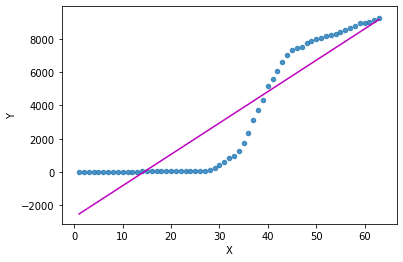

In [81]:
display(res.summary())

y_pred = res.predict(exog)

#idx = x_data.argsort()
#x_ord, y_pred_ord = x_data[idx], y_pred[idx]
plt.plot(x_data, y_pred, color='m')
plt.scatter(x_data, y_data,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [111]:
def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=1000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(x_data, k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)
y_data.tail()

ValueError: operands could not be broadcast together with shapes (65,) (65,2) 

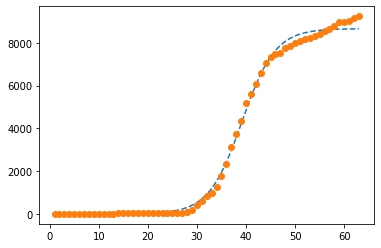

In [89]:
# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, 'o', label='Confirmed Data')

In [190]:
countryset = dataset[dataset["Country_Region"]=="Korea, South"]
countryset["StringencyIndex"].fillna(value=71.0,inplace = True)
x_data = range(len(countryset.index))[:-3]
y_data = countryset["ConfirmedCases"][:-3]
y_exg = countryset["StringencyIndex"][:-3]

timeser = [x_data,y_data]

In [191]:
y_exg.head(70)

9490    14.0
9491    14.0
9492    14.0
9493    14.0
9494    14.0
        ... 
9547    71.0
9548    71.0
9549    71.0
9550    71.0
9551    71.0
Name: StringencyIndex, Length: 62, dtype: float64

In [192]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
# contrived dataset
k = 5
data1 = y_data[:-k]
data2 = y_exg[:-k]
# fit model
#model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), trend=(1, 1, 0, 1))
                #   , time_varying_regression = True, mle_regression = False)
model_fit = model.fit(disp=False)
# make prediction
exog2 = (71,)
yhat = model_fit.predict(len(data1)-k, len(data1), exog=[exog2])
xhat = x_data[len(x_data)-k-1:]

print(yhat)


C:\Users\hauer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hauer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


52    8072.699352
53    8166.361062
54    8210.393838
55    8269.248404
56    8348.859280
57    8438.062664
dtype: float64


In [183]:
k = 10
data1 = y_data
data2 = y_exg
# fit model
#model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), trend=(1, 1, 0, 1), time_varying_regression = True, mle_regression = False)
model_fit = model.fit(disp=False)
# make prediction
#exog2 = (71,)
yhat = model_fit.predict(0, len(data1)-1)
#xhat = x_data[len(x_data)-k-1:]

print(yhat)

C:\Users\hauer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hauer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7865      722.727548
7866      722.720363
7867      215.850182
7868      373.139076
7869      185.394668
            ...     
7922    14955.783335
7923    18412.721242
7924    23543.788338
7925    25374.634485
7926    27983.212899
Length: 62, dtype: float64


In [197]:
len(y_data)

62

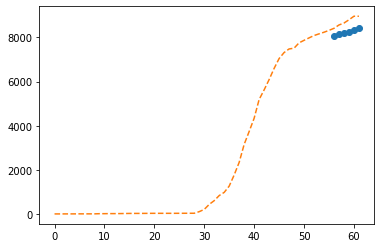

In [193]:
# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xhat, yhat, 'o', label='fitted')
ax.plot(x_data, y_data, '--', label='Confirmed Data')

In [202]:
res = sm.tsa.seasonal_decompose()
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

TypeError: list indices must be integers or slices, not Series